## Important formuals :

### - regression algorithm ---> Y = bx +  α

### - hypothesis ---> hθ(x) = θ0 + θ1x

### - cost function ---> J(θ0,θ1) = J(θ0 + θ1) = 1/2m m∑n=1(hθ(xi)-yi)^2

### - gradient descent :

### θ0 := θ0 - α 1/m m∑n=1(hθ(xi)-yi)x0

### θ1 := θ1 - α 1/m m∑n=1(hθ(xi)-yi)xi

### - data rescaling ---> x = [(x - mean)/range] 
#### mean = (sum of values / num of them) , range = (max - min)

### - normal equation ---> θ = (XT * X)^-1 * (XT) * (y)

# import libraries :

In [22]:
# use numpy to perform a mathematical operations on arrays.
import numpy as np
# use pandas to deal with dataset.
import pandas as pd
# use matplotlib to create static, animated, and interactive visualizations.
import matplotlib.pyplot as plt

## read data :

In [23]:
# specify the specific location of dataset.
path = 'E:\\Mostafa\\Study Materials\\Machin Learning Courses\\Hesham Asem Courses\\Practice\\Supervised Learning\\Regression\\Regression with one variable\\data.xlsx'
# read data from file in the specific location and add no headers.
# add names for columns Population for first column and Profit for the second column.
df = pd.read_excel(path, header=None, names=['Population', 'Profit'])

## show data details :


In [24]:
# print first 10 row of data.
print('data : \n' ,df.head(10) )
print('---------------------------------------')
# use describe method to see all important information about data like mean , std , min , etc.
print('describtion of data : \n',df.describe())
print('---------------------------------------')

data : 
    Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
5      8.3829  11.8860
6      7.4764   4.3483
7      8.5781  12.0000
8      6.4862   6.5987
9      5.0546   3.8166
---------------------------------------
describtion of data : 
        Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000
---------------------------------------


## draw data :


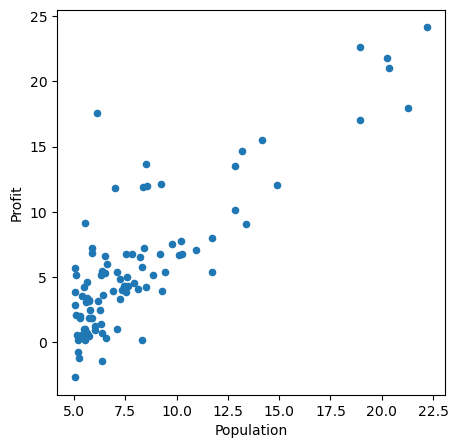

In [25]:
# draw data to see the distribution of it.
df.plot(kind='scatter', x='Population', y='Profit', figsize=(5,5))
plt.show()

# adding a new column called ones before the data 
## " this makes matrix multiplication work out easier "

In [26]:
# add new column to represent X0 with value 1 for all rows.
df.insert(0, 'Ones', 1)
# print first 10 row of new data.
print('Data after adding column "Ones" : \n' ,df.head(10) )

Data after adding column "Ones" : 
    Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233
5     1      8.3829  11.8860
6     1      7.4764   4.3483
7     1      8.5781  12.0000
8     1      6.4862   6.5987
9     1      5.0546   3.8166


# separate X (training data) from y (target variable) :

In [27]:
# shape method return 'number of rows' X 'number of columns' ---> (97,3).
# we use data.shape[1] to select only columns ---> (3) ---> ['Ones','Population','Profit'].
cols = df.shape[1]
# X represent taining data that will used in training to predict new targets.
# use ( : , ) to select all rows of data.
# use ( , 0 : cols-1) to select columns from first to penultimate one ---> [Ones : Population]. 
X = df.iloc[ : , 0 : cols-1 ]
# y represnt target variable that produced based on training data.
# use ( : , ) to select all rows of data.
# use ( , cols-1 : cols) to select last column only ---> ['Profit'].
y = df.iloc[ : , cols-1 : cols ]
# print first 10 row of X values.
print('X data : \n' ,X.head(10) )
print('---------------------------------------')
# print first 10 row of y values.
print('y data : \n' ,y.head(10) )

X data : 
    Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598
5     1      8.3829
6     1      7.4764
7     1      8.5781
8     1      6.4862
9     1      5.0546
---------------------------------------
y data : 
     Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233
5  11.8860
6   4.3483
7  12.0000
8   6.5987
9   3.8166


# convert from data frames to numpy matrices and initialize theta

In [28]:
# convert X to matrix with shape (97,2) to be prepared to work with it.
X = np.matrix(X.values)
# convert y to matrix with shape (97,1) to be prepared to work with it.
y = np.matrix(y.values)
# craete new matrix with shape (1,2) called theta with only 2 values.
# because we have only 2 variables so theta represented by 2 columns.
theta = np.matrix(np.array([0,0]))
# print first 10 values of 'X' matrix.
print('first 10 values of X : \n',X[0:10])
print('---------------------------------------')
# print values of 'theta' matrix.
print('theta :\n',theta)
print('---------------------------------------')
# print first 10 values of 'y' matrix.
print('first 10 values of y : \n',y[0:10])

first 10 values of X : 
 [[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]
 [1.     8.3829]
 [1.     7.4764]
 [1.     8.5781]
 [1.     6.4862]
 [1.     5.0546]]
---------------------------------------
theta :
 [[0 0]]
---------------------------------------
first 10 values of y : 
 [[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]
 [11.886 ]
 [ 4.3483]
 [12.    ]
 [ 6.5987]
 [ 3.8166]]


# Cost function :

In [29]:
# use this formula to calculate cost-function.
# hθ(x) = θ0 + θ1x.
# J(θ0 + θ1) = 1/2m m∑n=1(hθ(xi)-yi)^2.
# use theta.T to calculate hθ(x).
# to multiply 2 matrix it's dimansions must be under this formula A'col' = B'row'.
# so number of columns of 'X' must equal to number of rows of 'theta'.
# so we must transpose 'theta' to fit the multiplication with 'X'.
# x = (97,2) , theta.T = (2,1).
# new matrix shape will equal (97,1).
def cost_function(X, y, theta):
    # apply summation part of formula ---> m∑n=1(hθ(xi)-yi)^2.
    z = np.power(((X * theta.T) - y), 2)
    # calculate number of all data points in this dataset.
    m = len(X)
    # apply the other part of formula division by 2m which refer to the number of all data points.
    return np.sum(z) / (2 * m)
# print the value of cost function.
print('Cost-Function = ' , cost_function(X, y, theta))

Cost-Function =  32.072733877455676


## Gradient Descent function :

In [30]:
# use this formula to calculate gradient descent 
# θ0 := θ0 - α 1/m m∑n=1(hθ(xi)-yi)
# θ1 := θ1 - α 1/m m∑n=1((hθ(xi)-yi)xi)
def gradientDescent(X, y, theta, alpha, iters):
    # create a numpy array and convet it to matrix based on theta shape ---> (1,2) ---> [0. 0.].
    # the new value will be a matrix ---> [[0. 0.]].
    temp = np.matrix(np.zeros(theta.shape))
    # get number of parameters by convert number of columns in theta to integar.
    # calculate and assign number of parameters 'columns' in the theta array to 'parameters' variable.
    parameters = int(theta.ravel().shape[1])
    # create numpy array of zeros based on number of iterations.
    # it will represent array of 1000 zero 
    cost = np.zeros(iters)
    for i in range(iters):
        # calculate error by apply this part of formula m∑n=1(hθ(x^i)-y^i).
        error = (X * theta.T) - y
        for j in range(parameters):
            # apply the other part of formula by multiply by 'xi'
            term = np.multiply(error, X[:,j])
            # apply complete formula θ(0,1) - α 1/m m∑n=1((hθ(xi)-yi)xi)
            # temp[0,j] refer to new theta --->  θ(0,1) :=  θ(0,1) - α 1/m m∑n=1(hθ(xi)-yi 
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            # assign value of temp to theta to save new values of theta
            theta = temp
            # assign values of cost to cost function
            cost[i] = cost_function(X, y, theta)
    return theta, cost

## initialize variables for learning rate and iterations :

In [31]:
# learning rate.
# when it being small that means it will be slow but more accurated.
# when it being large that means it will be fast but less accurated.
alpha = 0.01
# number of iterations.
# when this number being large this mean that will be low cost.
# when this number being small this mean that will be high cost.
iters = 1000

## perform gradient descent to "fit" the model parameters :

In [32]:
# get values of hθ_(x) and theta from gradientDescent() method. 
hθ_x, cost = gradientDescent(X, y, theta, alpha, iters)
# print values of hθ_(x) ---> values of (θ0 , θ1).
print('hθ(x) = ' , hθ_x)
print('---------------------------------------')
# print cost of first 50 values.
print('cost : \n' , cost[0:50])
print('---------------------------------------')
# print the value of cost function
print('cost_function = ' , cost_function(X, y, hθ_x))

hθ(x) =  [[-3.24140214  1.1272942 ]]
---------------------------------------
cost : 
 [6.73719046 5.93159357 5.90115471 5.89522859 5.89009494 5.88500416
 5.87993248 5.87487909 5.86984391 5.86482687 5.85982789 5.85484692
 5.84988389 5.84493874 5.8400114  5.83510181 5.8302099  5.82533562
 5.82047889 5.81563965 5.81081784 5.8060134  5.80122627 5.79645638
 5.79170367 5.78696808 5.78224955 5.77754801 5.77286341 5.76819568
 5.76354477 5.75891061 5.75429313 5.7496923  5.74510803 5.74054027
 5.73598897 5.73145406 5.72693549 5.72243319 5.71794711 5.71347718
 5.70902336 5.70458558 5.70016379 5.69575792 5.69136792 5.68699373
 5.6826353  5.67829257]
---------------------------------------
cost_function =  4.515955503078914


## get best fit line :

In [33]:
# sperate values between min and max to 100 part.
x = np.linspace(df.Population.min(), df.Population.max(), 100)
# print the 100 values between min and max.
print('x : \n ',x)
print('---------------------------------------')
print('hθ(x) : \n ',hθ_x)
print('---------------------------------------')
# apply this formula hθ(x) = θ0 + θ1x.
f = hθ_x[0, 0] + (hθ_x[0, 1] * x)
print('f : \n ',f)

x : 
  [ 5.0269      5.20039596  5.37389192  5.54738788  5.72088384  5.8943798
  6.06787576  6.24137172  6.41486768  6.58836364  6.7618596   6.93535556
  7.10885152  7.28234747  7.45584343  7.62933939  7.80283535  7.97633131
  8.14982727  8.32332323  8.49681919  8.67031515  8.84381111  9.01730707
  9.19080303  9.36429899  9.53779495  9.71129091  9.88478687 10.05828283
 10.23177879 10.40527475 10.57877071 10.75226667 10.92576263 11.09925859
 11.27275455 11.44625051 11.61974646 11.79324242 11.96673838 12.14023434
 12.3137303  12.48722626 12.66072222 12.83421818 13.00771414 13.1812101
 13.35470606 13.52820202 13.70169798 13.87519394 14.0486899  14.22218586
 14.39568182 14.56917778 14.74267374 14.9161697  15.08966566 15.26316162
 15.43665758 15.61015354 15.78364949 15.95714545 16.13064141 16.30413737
 16.47763333 16.65112929 16.82462525 16.99812121 17.17161717 17.34511313
 17.51860909 17.69210505 17.86560101 18.03909697 18.21259293 18.38608889
 18.55958485 18.73308081 18.90657677 19.080072

## draw best fit line :

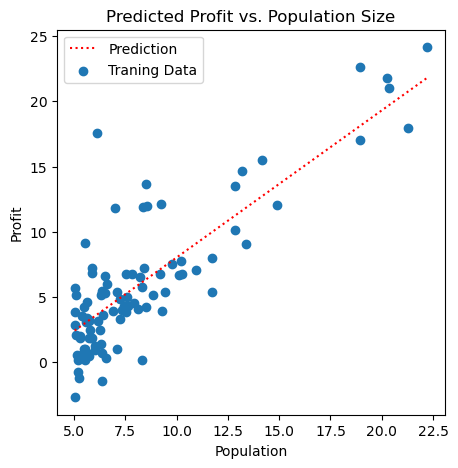

In [34]:
# make subplots to draw more plots in one graph.
fig, ax = plt.subplots(figsize=(5,5))
# draw the linear regression line. 
ax.plot(x, f, 'r', label='Prediction' , linestyle=':')
# draw the distribution of data. 
ax.scatter(df.Population, df.Profit, label='Traning Data')
# plot hint of all graphs types in the upper left side.
ax.legend(loc=2)
# set name of x axis to Population.
ax.set_xlabel('Population')
# set name of y axis to Profit.
ax.set_ylabel('Profit')
# set the title of graph to be Predicted Profit vs. Population Size.
ax.set_title('Predicted Profit vs. Population Size')
# show graph on screen.
plt.show()

## draw error graph :

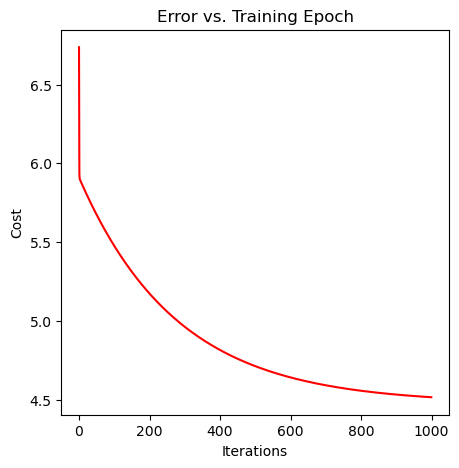

In [35]:
# make subplots to draw more plots in one graph.
fig, ax = plt.subplots(figsize=(5,5))
# draw error rate
ax.plot(np.arange(iters), cost, 'r')
# set name of x axis to Iterations.
ax.set_xlabel('Iterations')
# set name of y axis to Cost.
ax.set_ylabel('Cost')
# set the title of graph to be Error vs. Training Epoch.
ax.set_title('Error vs. Training Epoch')
plt.show()